**ZADANIE 1**


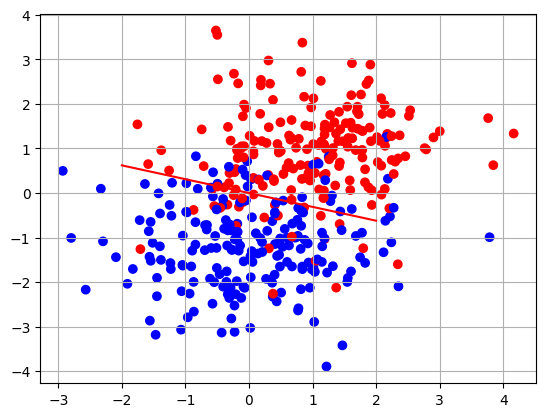

j=9, acc=0.5, std=0.851916104293756
y=-0.3104371445868474x+-0.0


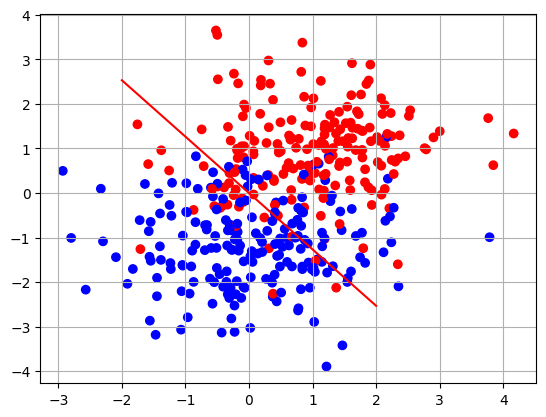

j=9, acc=1.0, std=0.22556631390140058
y=-1.2652736491854932x+-0.0


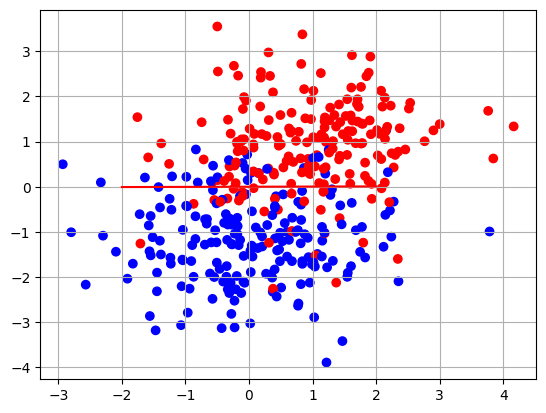

j=9, acc=0.9, std=2.1736345072559295
y=0.0036789540438612054x+-0.0


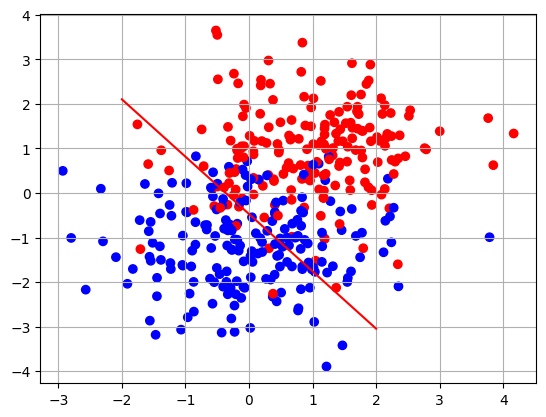

j=9, acc=0.75, std=0.3043494097768509
y=-1.2865592435729223x+-0.4707734504611453


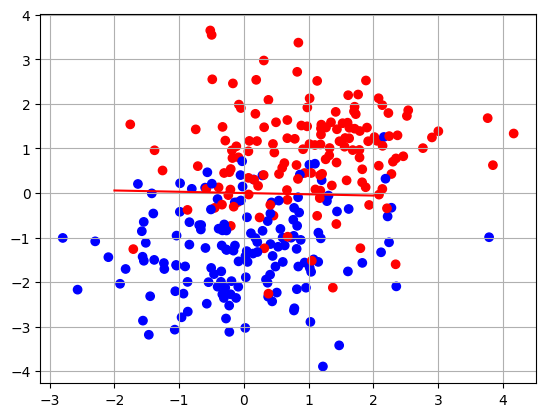

j=9, acc=0.88, std=0.14791480845825933
y=-0.028515475955628342x+-0.0


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


n = [2, 5, 10, 20, 100]
K1 = np.random.normal([0,-1],[1,1],[200,2])
K2 = np.random.normal([1,1],[1,1],[200,2])
y = [0]*200 + [1]*200


for i in n:
  for j in range(10):
    X1 = np.concatenate((K1, K2))
    X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=i/400)
    neuron = Perceptron(tol=1e-3)
    neuron.fit(X1_train, y_train)
    x1 = np.linspace(-2,2,100)
    x2 = -(1./neuron.coef_[0][1])*(neuron.coef_[0][0]*x1+neuron.intercept_[0])
    if j == 9:
      plt.plot(x1, x2, '-r')
      plt.scatter(X1_train[:,0], X1_train[:,1], c=y_train, cmap='bwr')
      plt.grid(True)
      plt.show()
      accuracy = neuron.score(X1_test, y_test)
      print(f"j={j}, acc={accuracy}, std={np.std(neuron.coef_)}")
      print("y="+str(-neuron.coef_[0][0]/neuron.coef_[0][1])+"x+"+str(-neuron.intercept_[0]/neuron.coef_[0][1]))

Dokładność klasyfikacji perceptronu jest bezpośrednio związana z ilością danych treningowych, natomiast jakość oceny modelu, mierzona accuracy, zależy od ilości danych testowych. W przypadku, gdy test_size wynosi 0.005 (i = 2), oznacza to, że jedynie 0.5% danych zostanie przeznaczone na zestaw testowy. Taka niewielka liczba próbek testowych może prowadzić do niedoszacowania jakości modelu. W celu uzyskania bardziej reprezentatywnej oceny, zaleca się stosowanie większych wartości test_size, zazwyczaj mieszczących się w zakresie od 0.2 do 0.3.

**ZADANIE 2**

In [20]:
# zad2
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = sk.datasets.load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
    )

df['target'] = iris.target

X = df.drop(columns=['target'])
Y = df['target']
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

  perceptron = Perceptron()
  perceptron.fit(x_train, y_train)
  y_pred = perceptron.predict(x_test)

  cm = confusion_matrix(y_test, y_pred)
  print('Confusion matrix: \n', cm)
  print('Accuracy: ', perceptron.score(x_test, y_test))



Confusion matrix: 
 [[ 8  0  0]
 [ 0  1 10]
 [ 0  0 11]]
Accuracy:  0.6666666666666666
Confusion matrix: 
 [[13  0  0]
 [ 4  4  3]
 [ 0  0  6]]
Accuracy:  0.7666666666666667
Confusion matrix: 
 [[13  0  0]
 [ 0  4  0]
 [ 0  2 11]]
Accuracy:  0.9333333333333333
Confusion matrix: 
 [[13  0  0]
 [ 0 10  0]
 [ 0  5  2]]
Accuracy:  0.8333333333333334
Confusion matrix: 
 [[ 8  0  0]
 [ 1  0 10]
 [ 0  0 11]]
Accuracy:  0.6333333333333333


Perceptron to prosty model liniowy, który może być skuteczny w przypadku problemów binarnych, ale dla danych Iris, gdzie mamy trzy klasy (setosa, versicolor, virginica), może nie być wystarczająco skomplikowany. Model ten działa dobrze w przypadku problemów liniowo separowalnych, ale dane Iris mogą wymagać bardziej złożonego modelu.

In [21]:
# zad3
n = [0.1, 0.3, 0.5]
sum = [0, 0, 0]
for _ in range(100):
	for i in n:
		X = df.drop(columns=['target'])
		Y = df['target']
		x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=i)

		perceptron = Perceptron()
		perceptron.fit(x_train, y_train)
		y_pred = perceptron.predict(x_test)

		sum[n.index(i)] = perceptron.score(x_test, y_test)
#print mean accuracy
print('Mean accuracy for 0.1: ', sum[0])
print('Mean accuracy for 0.3: ', sum[1])
print('Mean accuracy for 0.5: ', sum[2])



Mean accuracy for 0.1:  0.26666666666666666
Mean accuracy for 0.3:  0.6
Mean accuracy for 0.5:  0.68


Zwiększenie wielkości zbioru testującego lepiej ukazuje słabą dokładność modelu.

**ZADANIE 4**

Text(0, 0.5, 'Accuracy')

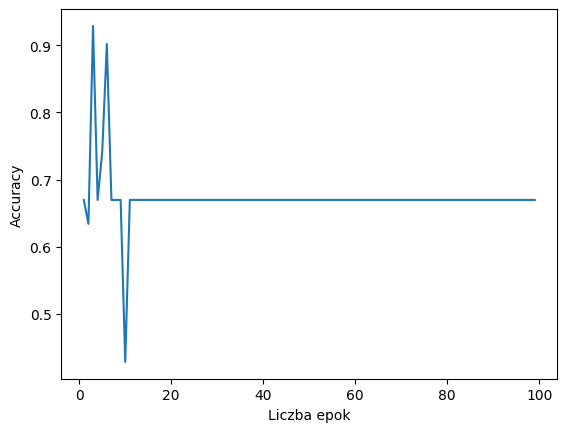

In [22]:
import warnings
warnings.warn = lambda a,b: '' # by pozbyć się warningów

epochs = [i for i in range(1, 100)]
acc = []
X = df.drop(columns=['target'])
Y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

for i in epochs:
  perceptron = Perceptron(max_iter = i, early_stopping=False)
  perceptron.fit(x_train, y_train)
  acc.append(perceptron.score(x_train, y_train))

plt.plot(epochs, acc )
plt.xlabel('Liczba epok')
plt.ylabel('Accuracy')


Możemy zauważyć, że accuracy stabilizuje się po około 20 epokach. Jest to spowołane tym, że perceptron jest w stanie nauczyć się danych w krótkim czasie, a dalsze iteracje nie przynoszą już znaczącej poprawy.  Z tego powodu wartość *max_iter* w przypadku perceptronu powinna być ustawiona na stosunkowo niską wartość, np. 20-30.